## 로지스틱 회귀분석

In [1]:
# 파일명만 적을 수 있도록
import os
from os import chdir
chdir("/home/pirl/test/실습파일")
os.getcwd()

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics

In [2]:
ds_hmeq = pd.read_csv("HMEQ.csv")
ds_hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [3]:
ds_hmeq.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [4]:
ds_hmeq["JOB"].fillna("Other", inplace = True)
ds_hmeq.fillna(ds_hmeq.mean(), inplace = True)

In [5]:
ds_hmeq.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [6]:
np.random.seed(seed = 1234)
msk = np.random.rand(ds_hmeq.shape[0],) < 0.7
ds_hmeq_train = ds_hmeq[msk]
ds_hmeq_test = ds_hmeq[~msk]

print("train data size: {}".format(ds_hmeq_train.shape))
print("test data size: {}".format(ds_hmeq_test.shape))

train data size: (2604, 13)
test data size: (1144, 13)


In [7]:
ds_hmeq_train = sm.add_constant(ds_hmeq_train)
ds_hmeq_train.head()

,const,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1.0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1.0,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,1.0,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
5,1.0,0,2900,103949,112505.0,HomeImp,Office,1.0,0,0.0,96.102330,0.0,13,30.051136
6,1.0,0,2900,104373,120702.0,HomeImp,Office,2.0,0,0.0,101.540297,0.0,13,29.915859


In [8]:
ds_hmeq_train.isnull().sum()

const      0
BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [9]:
log_model = sm.Logit.from_formula("""BAD~LOAN+MORTDUE+VALUE+C(REASON)+C(JOB)+YOJ+DEROG+DELINQ+CLAGE+NINQ+CLNO+DEBTINC+1""",ds_hmeq_train)
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.244454
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2604
Model:                          Logit   Df Residuals:                     2587
Method:                           MLE   Df Model:                           16
Date:                Thu, 14 Feb 2019   Pseudo R-squ.:                  0.2096
Time:                        17:33:19   Log-Likelihood:                -636.56
converged:                       True   LL-Null:                       -805.35
                                        LLR p-value:                 4.004e-62
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -4.7741      0.518     -9.209      0.000      -5.790      -3.758

In [10]:
y_pred = log_result.predict(ds_hmeq_test)
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head()

3    0
4    0
7    0
8    0
9    0
dtype: int64

In [11]:
print("Accuracy:{0:.3f}".format(metrics.accuracy_score(ds_hmeq_test['BAD'],y_pred_class)))

Accuracy:0.924


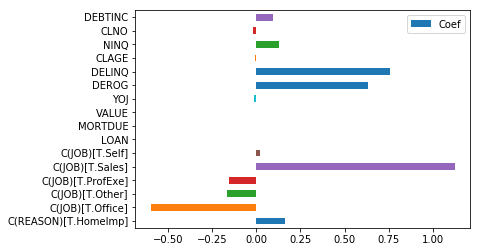

In [12]:
ds_logistic_coef = pd.DataFrame({"Coef":log_result.params.values[1:]}, index=log_model.exog_names[1:])
ds_logistic_coef.plot.barh(y="Coef");

In [13]:
from sklearn.preprocessing import scale, robust_scale,minmax_scale
ds_hmeq_char = ds_hmeq.select_dtypes(include = "object")
ds_hmeq_numeric = ds_hmeq.select_dtypes(exclude = "object")
# Data Scale
ds_hmeq_char_train = ds_hmeq_char[msk]
ds_hmeq_numeric_scaled_train = scale(ds_hmeq_numeric[msk])
ds_hmeq_numeric_scaled_train = pd.DataFrame(ds_hmeq_numeric_scaled_train, columns = ds_hmeq_numeric.columns)
ds_hmeq_numeric_scaled_train.head()

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,3.124153,-1.546445,-0.994709,-1.227453,-0.020546,-0.26517,-0.337599,-0.962571,-0.019984,-1.424138,0.372555
1,3.124153,-1.537818,-1.040082,-1.177823,0.250021,-0.26517,-0.337599,-1.117329,-0.663021,-1.424138,0.344145
2,-0.320087,-1.494683,0.598052,0.247041,-0.967531,-0.26517,-0.337599,-1.090197,-0.663021,-0.898712,-0.313747
3,-0.320087,-1.442920,0.633069,0.092557,-1.102815,-0.26517,-0.337599,-1.027931,-0.663021,-0.898712,-0.504711
4,-0.320087,-1.442920,0.642472,0.242451,-0.967531,-0.26517,-0.337599,-0.961666,-0.663021,-0.898712,-0.521514


In [14]:
#BAD 데이터를 0과 1로 변환
ds_hmeq_numeric_scaled_train["BAD"] = np.where(ds_hmeq_numeric_scaled_train["BAD"]>0,1,0)
ds_hmeq_numeric_scaled_train.head()
# scale된 숫자형 데이터와 범주형 데이터 결합
ds_hmeq_scaled_train = pd.concat([ds_hmeq_numeric_scaled_train, ds_hmeq_char_train.reset_index(drop = True)], axis = 1)
ds_hmeq_scaled_train.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,1,-1.546445,-0.994709,-1.227453,-0.020546,-0.26517,-0.337599,-0.962571,-0.019984,-1.424138,0.372555,HomeImp,Other
1,1,-1.537818,-1.040082,-1.177823,0.250021,-0.26517,-0.337599,-1.117329,-0.663021,-1.424138,0.344145,HomeImp,Other
2,0,-1.494683,0.598052,0.247041,-0.967531,-0.26517,-0.337599,-1.090197,-0.663021,-0.898712,-0.313747,HomeImp,Office
3,0,-1.442920,0.633069,0.092557,-1.102815,-0.26517,-0.337599,-1.027931,-0.663021,-0.898712,-0.504711,HomeImp,Office
4,0,-1.442920,0.642472,0.242451,-0.967531,-0.26517,-0.337599,-0.961666,-0.663021,-0.898712,-0.521514,HomeImp,Office


In [15]:
# from_formula 함수를 이용하여 변수 역할 지정
scaled_log_model = sm.Logit.from_formula("""BAD ~ LOAN + MORTDUE + VALUE + REASON + JOB +YOJ+DEROG+DELINQ+CLAGE+NINQ+CLNO+DEBTINC+1""",ds_hmeq_scaled_train)
# 적합
scaled_log_result = scaled_log_model.fit()
# 설명변수 중요도
ds_log_scaled_coef = pd.DataFrame({"Coef":scaled_log_result.params.value[1:]}, index = scaled_log_model.exog_names[1:])
ds_log_scaled_coef.plot.barh(y = "Coef", legend = False)

Optimization terminated successfully.
         Current function value: 0.244454
         Iterations 7


AttributeError: 'Series' object has no attribute 'value'